<a href="https://colab.research.google.com/github/roshansadath/COMP6721-AppliedAI/blob/main/TransferLearning_ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings, pandas
import numpy as np
from PIL import Image
import torch.nn as nn
import seaborn as sns
from tqdm import tqdm
from sklearn.manifold import TSNE
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.simplefilter("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
data_path = "drive/My Drive/Simple_Chest_XRay/"
#data_path = "drive/My Drive/NIH_Chest_XRay/"
#data_path = "drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 1
batch_size = 64
num_epochs = 30

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

**DATA PREPROCESSING**


In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio)

 **LOAD THE RESNET18 WEIGHTS FROM DATASET 3 AND TRANSFER LEARN ON DATASET 2**


In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

In [ ]:
# Define the pretrained ResNet18 model and perform Fine-Tuning
model = torch.load("{}resnet18.pth")
model.fc = nn.Linear(512, len(dataset.classes))
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0002)

losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "TL_ResNet18", num_epochs)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
Epoch 1/30: 100%|██████████| 143/143 [00:50<00:00,  2.83batch/s, loss=0.792]

Epoch: 1 | Accuracy: 0.6404 | Loss: 0.9337 | Recall: 0.5859 | Precision: 0.6102 | F-Score: 0.5913 | Time: 50.5041s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.6865 | Loss: 0.8626 | Recall: 0.6790 | Precision: 0.6718 | F-score: 0.6664



Epoch 2/30: 100%|██████████| 143/143 [00:34<00:00,  4.09batch/s, loss=1.3]

Epoch: 2 | Accuracy: 0.4481 | Loss: 1.4405 | Recall: 0.4740 | Precision: 0.5175 | F-Score: 0.4747 | Time: 35.0147s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.4740 | Loss: 1.2748 | Recall: 0.3981 | Precision: 0.6564 | F-score: 0.3487



Epoch 3/30: 100%|██████████| 143/143 [00:38<00:00,  3.71batch/s, loss=1.12]


Epoch: 3 | Accuracy: 0.5581 | Loss: 1.1299 | Recall: 0.4773 | Precision: 0.5183 | F-Score: 0.4762 | Time: 38.6504s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.5436 | Loss: 1.1128 | Recall: 0.5109 | Precision: 0.5483 | F-score: 0.4862



Epoch 4/30: 100%|██████████| 143/143 [00:36<00:00,  3.89batch/s, loss=0.811]


Epoch: 4 | Accuracy: 0.6349 | Loss: 0.9496 | Recall: 0.5017 | Precision: 0.5409 | F-Score: 0.5024 | Time: 36.9221s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.6904 | Loss: 0.8377 | Recall: 0.6677 | Precision: 0.6681 | F-score: 0.6550



Epoch 5/30: 100%|██████████| 143/143 [00:35<00:00,  4.06batch/s, loss=0.783]


Epoch: 5 | Accuracy: 0.7033 | Loss: 0.7872 | Recall: 0.5325 | Precision: 0.5711 | F-Score: 0.5358 | Time: 35.3702s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.6804 | Loss: 0.7925 | Recall: 0.6547 | Precision: 0.6566 | F-score: 0.6473



Epoch 6/30: 100%|██████████| 143/143 [00:34<00:00,  4.10batch/s, loss=0.841]


Epoch: 6 | Accuracy: 0.7221 | Loss: 0.7255 | Recall: 0.5572 | Precision: 0.5951 | F-Score: 0.5625 | Time: 35.0754s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.6858 | Loss: 0.8457 | Recall: 0.6645 | Precision: 0.6746 | F-score: 0.6605



Epoch 7/30: 100%|██████████| 143/143 [00:36<00:00,  3.89batch/s, loss=0.714]


Epoch: 7 | Accuracy: 0.7552 | Loss: 0.6678 | Recall: 0.5799 | Precision: 0.6180 | F-Score: 0.5869 | Time: 36.9587s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.7324 | Loss: 0.7209 | Recall: 0.7167 | Precision: 0.7508 | F-score: 0.7175



Epoch 8/30: 100%|██████████| 143/143 [00:35<00:00,  4.05batch/s, loss=0.565]


Epoch: 8 | Accuracy: 0.7784 | Loss: 0.6082 | Recall: 0.6007 | Precision: 0.6388 | F-Score: 0.6092 | Time: 35.6111s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.7745 | Loss: 0.6128 | Recall: 0.7402 | Precision: 0.7833 | F-score: 0.7452



Epoch 9/30: 100%|██████████| 143/143 [00:35<00:00,  4.07batch/s, loss=0.44]


Epoch: 9 | Accuracy: 0.8008 | Loss: 0.5461 | Recall: 0.6201 | Precision: 0.6578 | F-Score: 0.6297 | Time: 35.3553s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.7791 | Loss: 0.5916 | Recall: 0.7407 | Precision: 0.7929 | F-score: 0.7490



Epoch 10/30: 100%|██████████| 143/143 [00:35<00:00,  4.00batch/s, loss=0.502]


Epoch: 10 | Accuracy: 0.8128 | Loss: 0.5092 | Recall: 0.6371 | Precision: 0.6742 | F-Score: 0.6474 | Time: 36.0155s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8028 | Loss: 0.5324 | Recall: 0.7741 | Precision: 0.8152 | F-score: 0.7889



Epoch 11/30: 100%|██████████| 143/143 [00:36<00:00,  3.89batch/s, loss=0.547]


Epoch: 11 | Accuracy: 0.8324 | Loss: 0.4644 | Recall: 0.6530 | Precision: 0.6895 | F-Score: 0.6639 | Time: 37.1864s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.7974 | Loss: 0.5296 | Recall: 0.7675 | Precision: 0.8039 | F-score: 0.7811



Epoch 12/30: 100%|██████████| 143/143 [00:35<00:00,  4.06batch/s, loss=0.502]


Epoch: 12 | Accuracy: 0.8313 | Loss: 0.4658 | Recall: 0.6661 | Precision: 0.7017 | F-Score: 0.6773 | Time: 35.5446s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8012 | Loss: 0.5525 | Recall: 0.7715 | Precision: 0.8203 | F-score: 0.7866



Epoch 13/30: 100%|██████████| 143/143 [00:35<00:00,  4.05batch/s, loss=0.405]


Epoch: 13 | Accuracy: 0.8470 | Loss: 0.4180 | Recall: 0.6786 | Precision: 0.7134 | F-Score: 0.6900 | Time: 35.6230s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8012 | Loss: 0.5663 | Recall: 0.7860 | Precision: 0.8056 | F-score: 0.7890



Epoch 14/30: 100%|██████████| 143/143 [00:36<00:00,  3.90batch/s, loss=0.325]


Epoch: 14 | Accuracy: 0.8671 | Loss: 0.3733 | Recall: 0.6911 | Precision: 0.7251 | F-Score: 0.7026 | Time: 37.0011s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8410 | Loss: 0.4568 | Recall: 0.8250 | Precision: 0.8435 | F-score: 0.8314



Epoch 15/30: 100%|██████████| 143/143 [00:35<00:00,  4.00batch/s, loss=0.378]


Epoch: 15 | Accuracy: 0.8607 | Loss: 0.3774 | Recall: 0.7014 | Precision: 0.7345 | F-Score: 0.7130 | Time: 36.3684s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8479 | Loss: 0.4394 | Recall: 0.8323 | Precision: 0.8491 | F-score: 0.8379



Epoch 16/30: 100%|██████████| 143/143 [00:35<00:00,  4.03batch/s, loss=0.267]


Epoch: 16 | Accuracy: 0.8847 | Loss: 0.3175 | Recall: 0.7122 | Precision: 0.7444 | F-Score: 0.7238 | Time: 35.8990s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8173 | Loss: 0.5134 | Recall: 0.7891 | Precision: 0.8313 | F-score: 0.8016



Epoch 17/30: 100%|██████████| 143/143 [00:34<00:00,  4.10batch/s, loss=0.293]


Epoch: 17 | Accuracy: 0.8860 | Loss: 0.3158 | Recall: 0.7218 | Precision: 0.7532 | F-Score: 0.7333 | Time: 35.3414s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8394 | Loss: 0.4737 | Recall: 0.8376 | Precision: 0.8304 | F-score: 0.8333



Epoch 18/30: 100%|██████████| 143/143 [00:36<00:00,  3.87batch/s, loss=0.501]


Epoch: 18 | Accuracy: 0.9030 | Loss: 0.2703 | Recall: 0.7314 | Precision: 0.7621 | F-Score: 0.7429 | Time: 37.4534s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8203 | Loss: 0.5319 | Recall: 0.8027 | Precision: 0.8247 | F-score: 0.8057



Epoch 19/30: 100%|██████████| 143/143 [00:35<00:00,  4.02batch/s, loss=0.508]


Epoch: 19 | Accuracy: 0.9129 | Loss: 0.2444 | Recall: 0.7406 | Precision: 0.7705 | F-Score: 0.7519 | Time: 36.3913s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8326 | Loss: 0.4716 | Recall: 0.8205 | Precision: 0.8262 | F-score: 0.8211



Epoch 20/30: 100%|██████████| 143/143 [00:35<00:00,  4.07batch/s, loss=0.198]


Epoch: 20 | Accuracy: 0.9187 | Loss: 0.2217 | Recall: 0.7493 | Precision: 0.7784 | F-Score: 0.7605 | Time: 35.6742s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8234 | Loss: 0.5449 | Recall: 0.8084 | Precision: 0.8271 | F-score: 0.8140



Epoch 21/30: 100%|██████████| 143/143 [00:35<00:00,  4.02batch/s, loss=0.148]


Epoch: 21 | Accuracy: 0.9289 | Loss: 0.1960 | Recall: 0.7576 | Precision: 0.7861 | F-Score: 0.7688 | Time: 36.1490s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8280 | Loss: 0.5383 | Recall: 0.8244 | Precision: 0.8321 | F-score: 0.8260



Epoch 22/30: 100%|██████████| 143/143 [00:35<00:00,  3.97batch/s, loss=0.255]


Epoch: 22 | Accuracy: 0.9325 | Loss: 0.1892 | Recall: 0.7654 | Precision: 0.7931 | F-Score: 0.7764 | Time: 36.7399s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8173 | Loss: 0.5326 | Recall: 0.8209 | Precision: 0.8151 | F-score: 0.8117



Epoch 23/30: 100%|██████████| 143/143 [00:35<00:00,  4.04batch/s, loss=0.351]


Epoch: 23 | Accuracy: 0.9387 | Loss: 0.1719 | Recall: 0.7728 | Precision: 0.7997 | F-Score: 0.7836 | Time: 36.1872s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8486 | Loss: 0.4831 | Recall: 0.8341 | Precision: 0.8506 | F-score: 0.8404



Epoch 24/30: 100%|██████████| 143/143 [00:35<00:00,  4.06batch/s, loss=0.0451]


Epoch: 24 | Accuracy: 0.9440 | Loss: 0.1555 | Recall: 0.7798 | Precision: 0.8061 | F-Score: 0.7904 | Time: 35.8858s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8402 | Loss: 0.5076 | Recall: 0.8380 | Precision: 0.8439 | F-score: 0.8388



Epoch 25/30: 100%|██████████| 143/143 [00:35<00:00,  4.01batch/s, loss=0.156]


Epoch: 25 | Accuracy: 0.9503 | Loss: 0.1358 | Recall: 0.7865 | Precision: 0.8121 | F-Score: 0.7970 | Time: 36.3080s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8555 | Loss: 0.4397 | Recall: 0.8455 | Precision: 0.8647 | F-score: 0.8539



Epoch 26/30: 100%|██████████| 143/143 [00:36<00:00,  3.92batch/s, loss=0.144]


Epoch: 26 | Accuracy: 0.9519 | Loss: 0.1319 | Recall: 0.7928 | Precision: 0.8179 | F-Score: 0.8031 | Time: 37.2964s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8410 | Loss: 0.5468 | Recall: 0.8273 | Precision: 0.8496 | F-score: 0.8334



Epoch 27/30: 100%|██████████| 143/143 [00:34<00:00,  4.09batch/s, loss=0.191]


Epoch: 27 | Accuracy: 0.9515 | Loss: 0.1345 | Recall: 0.7986 | Precision: 0.8230 | F-Score: 0.8088 | Time: 35.8032s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8509 | Loss: 0.4856 | Recall: 0.8455 | Precision: 0.8467 | F-score: 0.8452



Epoch 28/30: 100%|██████████| 143/143 [00:35<00:00,  4.08batch/s, loss=0.192]


Epoch: 28 | Accuracy: 0.9569 | Loss: 0.1209 | Recall: 0.8042 | Precision: 0.8280 | F-Score: 0.8142 | Time: 35.8382s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8517 | Loss: 0.5572 | Recall: 0.8390 | Precision: 0.8538 | F-score: 0.8436



Epoch 29/30: 100%|██████████| 143/143 [00:35<00:00,  4.01batch/s, loss=0.0781]


Epoch: 29 | Accuracy: 0.9690 | Loss: 0.0896 | Recall: 0.8098 | Precision: 0.8330 | F-Score: 0.8196 | Time: 36.4831s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8265 | Loss: 0.6361 | Recall: 0.8092 | Precision: 0.8361 | F-score: 0.8148



Epoch 30/30: 100%|██████████| 143/143 [00:35<00:00,  3.97batch/s, loss=0.0759]


Epoch: 30 | Accuracy: 0.9658 | Loss: 0.0917 | Recall: 0.8149 | Precision: 0.8376 | F-Score: 0.8246 | Time: 37.1567s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.8211 | Loss: 0.6046 | Recall: 0.8283 | Precision: 0.8343 | F-score: 0.8257



**SAVE MODEL PARAMETERS**

In [ ]:
torch.save(model.state_dict(), "{}TL_resnet18.pth".format(data_path)) 

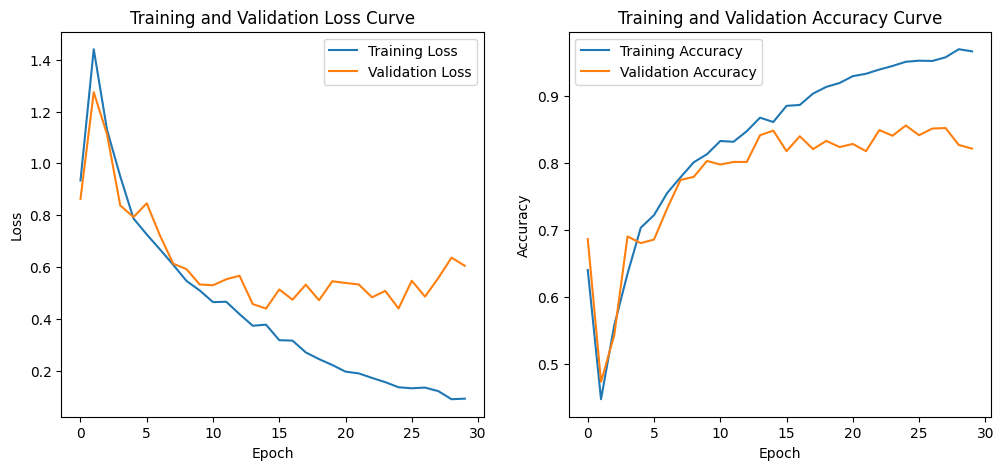

In [ ]:
#Plot the Accuracy and Loss Curves of the model for Training and Validation
plot_model_curves(losses, accuracies, v_accuracies, v_losses)

**EVALUATE MODEL ON VALIDATION AND TEST SET**

MODEL PERFORMANCE ON TEST SET
Accuracy: 0.8454 | Loss: 0.5780 | Recall: 0.8471 | Precision: 0.8462 | F-score: 0.8432



<Figure size 800x800 with 0 Axes>

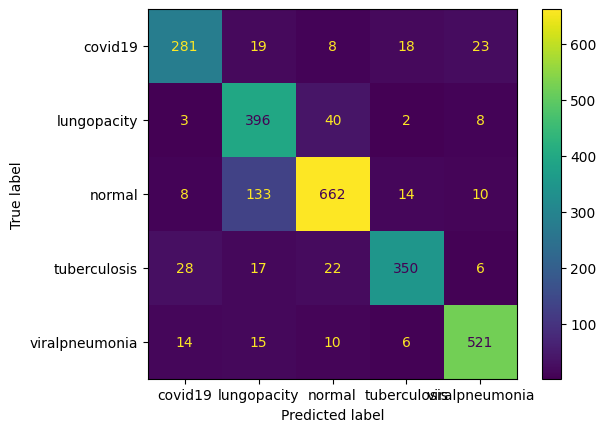

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "ResNet18")

**PLOT TSNE AND WITHIN CLASS VARIANCE**

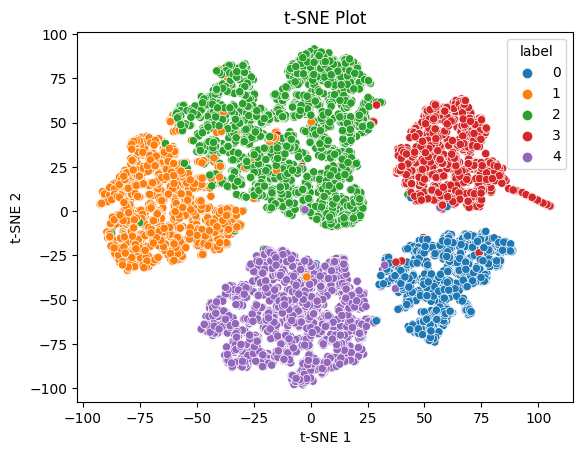

In [ ]:
#Obtain the TSNE Plot
plotTSNE(train_loader, device, model)

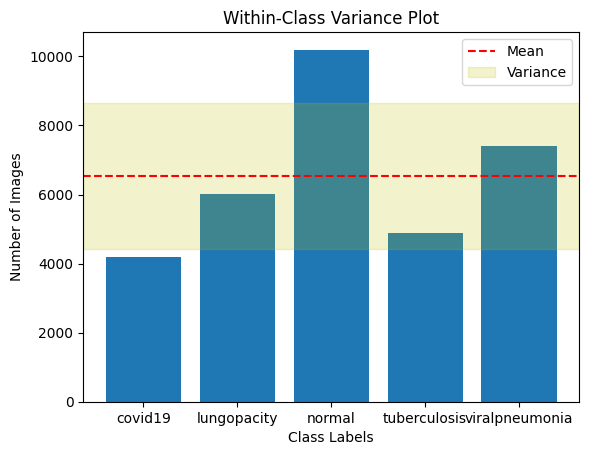

In [ ]:
#Plot the Within-Class Variance of the dataset
plot_within_class_variance(dataset)

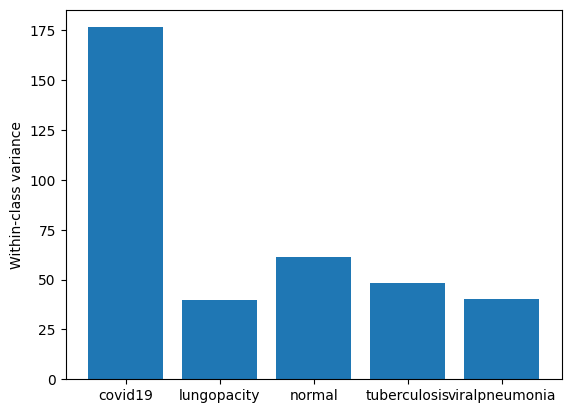

In [ ]:
def within_class_variance(dataset, model):
    # Set the model to evaluation mode
    model.eval()
    # Get the feature vectors and labels for the dataset
    features = []
    labels = []
    for images, targets in train_loader:
        with torch.no_grad():
          images = images.to(device)
          targets = targets.to(device)
          output = model(images)
          features.append(output.cpu().numpy()[0])
          labels.append(targets.cpu().numpy()[0])
    features = np.array(features)
    labels = np.array(labels)
    
    # Calculate the within-class variance for each class
    class_variances = []
    for c in np.unique(labels):
        class_features = features[labels == c]
        class_mean = np.mean(class_features, axis=0)
        class_variance = np.mean(np.sum((class_features - class_mean)**2, axis=1))
        class_variances.append(class_variance)
    
    return class_variances

# Define the dataset and model
# Calculate the within-class variance
class_variances = within_class_variance(dataset, model)

# Plot the within-class variances for each class
plt.bar(np.arange(len(class_variances)), class_variances)
plt.xticks(np.arange(len(class_variances)), dataset.classes)
plt.ylabel('Within-class variance')
plt.show()